# Audio Processing

In this livecode we will both generate sound waves & analyze `.wav` files on the hard drive.

The goal is to understand how a sound is encoded in numbers, the same way images or videos are, as well as basically anything a computer manipulates.

In [2]:
!pip install scipy --quiet


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.io import wavfile
from IPython.display import Audio

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Sound Synthesis

Before we generate sound from scratch, let's see how the computer records sound from a microphone:

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/mic_recording_original.png" width=1000>

In [4]:
R = 44100 # Sampling rate
D = 3     # Duration of the sound

❓ Write a `note(f)` function which takes a frequency $f$ (in Hz) and generate a sinusoide signal with sampling rate `R` and duration `D` (constants).

<details>
    <summary>💡 <strong>Hint</strong> </summary>
    
A single-frequency sound wave with frequency $f$ and maximum amplitude $A$ is represented by the sine function:

$$y(t)=A \times sin(2 \pi f t)$$

where $t$ is time and $y(t)$ is the amplitude of the sound wave at time $t$.

You can consider for now that the maximum amplitude $A$ is `1`.

Remember, you can generate a big list of numbers using [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
</details>

In [5]:
def note(f):
    A=1
    t=np.linspace(0,D,D*R)
    y_t=A*np.sin(2*np.pi*f*t)
    return(y_t)

In [6]:
note(440)

array([ 0.00000000e+00,  6.26487971e-02,  1.25051464e-01, ...,
       -1.25051464e-01, -6.26487971e-02,  6.43031366e-13])

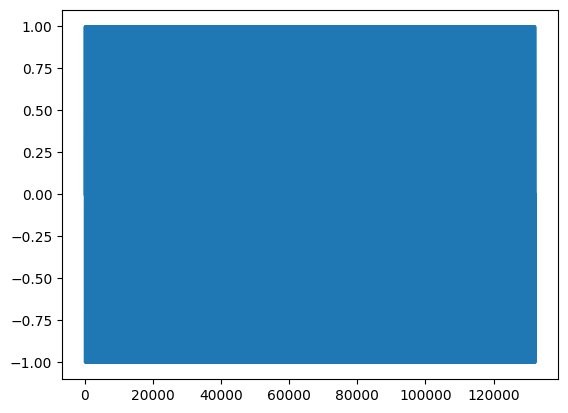

In [7]:
plt.plot(note(440))

❓ Plot the output of `note(f)` for `440 Hz`. For `1Hz`. What do you see?

In [8]:
@interact(freq=(1, 440, 1))
def note_interactive(freq):
    A=1
    t=np.linspace(0,D,D*R)
    y_t=A*np.sin(2*np.pi*freq*t)
    plt.plot(y_t)

interactive(children=(IntSlider(value=220, description='freq', max=440, min=1), Output()), _dom_classes=('widg…

❓ Call the `note` function to generate an `A` (440 Hz) from the diapason. Play it.

<details>
    <summary>💡 <strong>Hint</strong></summary>

Use [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) from `IPython.display` already imported in the notebook at the first cell)
</details>

In [9]:
@interact(freq=(1, 440, 1))
def note_interactive_audio(freq):
    A=1
    t=np.linspace(0,D,D*R)
    y_t=A*np.sin(2*np.pi*freq*t)
    return(Audio(data=y_t, rate=R,autoplay=True))

interactive(children=(IntSlider(value=220, description='freq', max=440, min=1), Output()), _dom_classes=('widg…

❓ Try and layer several notes, like `A` + the perfect fifth, major (or minor) third, etc into a `chord` variable. Play it!

<details>
    <summary>💡 <strong>Hint</strong></summary>
    
Check out the [Frequency Ratio](https://en.wikipedia.org/wiki/Interval_(music)#Frequency_ratios) on Wikipedia. For instance, the perfect fifth has a $\frac{3}{2}$ ratio
</details>

In [90]:
@interact(freq=(1, 440, 1))
def chords(freq):
    base_note = note(freq)
    fifth_note = note(freq * 3 / 2)
    major_third = note(freq * 1 / 3)
    chord = base_note + 0.1 * fifth_note + 1 * major_third
    plt.plot(chord[0:1000])
    print(chord.shape)
    return(Audio(data=chord, rate=R, autoplay=True))

interactive(children=(IntSlider(value=220, description='freq', max=440, min=1), Output()), _dom_classes=('widg…

❓ Plot the first `1000` samples of the chord

In [ ]:
# YOUR CODE HERE

## [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 
> **Wikipedia**

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/fourier_transformation.png" width=550>

Let's use [`scipy.fft`](https://docs.scipy.org/doc/scipy/tutorial/fft.html) to analyze the signals we built above.

Run the following code. Change the `chord` above, and replot it. What do you see?

In [12]:
base_note = note(440)
fifth_note = note(440 * 3 / 2)
major_third = note(440 * 5 / 4)
chord = base_note + 0.1 * fifth_note + 1 * major_third

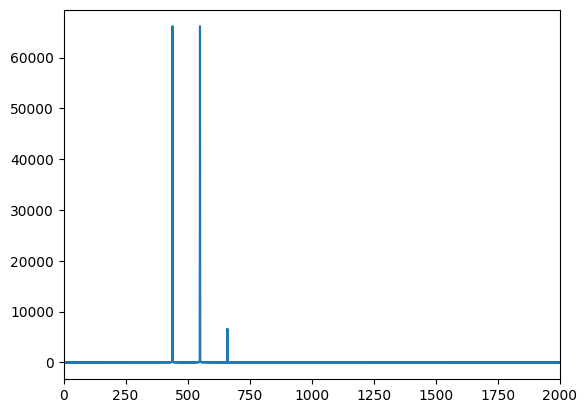

In [13]:
import scipy.fft

def plot_fft(signal, rate, freq_max):
    Y = np.abs(scipy.fft.fft(signal))
    X = np.abs(scipy.fft.fftfreq(Y.size) * rate)
    plt.xlim(0, freq_max)
    plt.plot(X, Y)
    
plot_fft(chord, R, 2000)

## Real-life samples

Let's perform `fft` on the `.wav` files in the folder:

In [14]:
!ls -lh *.wav

-rw-r--r--  1 WDescamps  staff   505K 10 jul  2023 bird.wav
-rw-r--r--  1 WDescamps  staff   379K 10 jul  2023 blissful_bell.wav
-rw-r--r--  1 WDescamps  staff   400K 10 jul  2023 guitar_G.wav
-rw-r--r--  1 WDescamps  staff   517K 24 jan 17:36 output.wav
-rw-r--r--  1 WDescamps  staff   265K 10 jul  2023 piano_F.wav
-rw-r--r--  1 WDescamps  staff   100K 10 jul  2023 snare_80s.wav


Let's load the audio of `bird.wav` and visualize the sound **waveform**

In [15]:
rate, audio = wavfile.read("bird.wav")
audio.T[0][R:(R+10)]

array([-396, -616, -699, -663, -531, -339, -138,   25,  126,  166],
      dtype=int16)

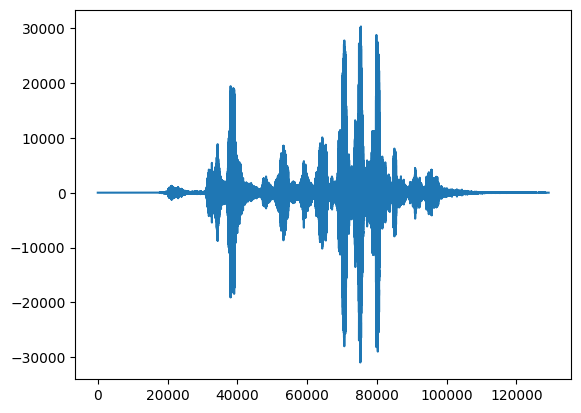

In [16]:
rate, audio = wavfile.read("bird.wav")
plt.plot(audio.T[0])

Now let's apply and plot the FFT of that signal & play it

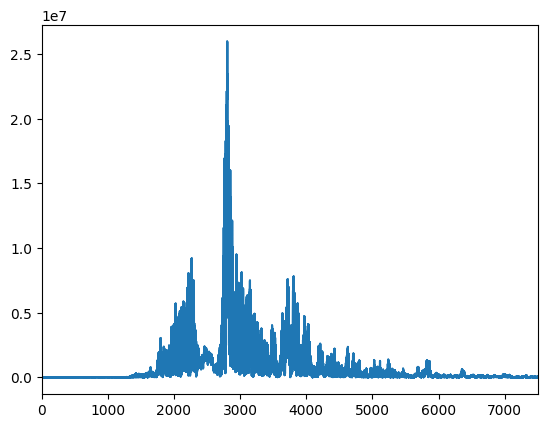

In [25]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

---

Awesome! 

❓ Now it's your turn: try to reproduce that analysis with the other sounds (cf `!ls -lh *.wav` cell above)

### Et si on s'amusait un peu? 

In [127]:
!pip install pyaudio


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [128]:
!pip install wave

  Preparing metadata (setup.py) ... done
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1220 sha256=cb27aa5ee14ce95759a81b560d5c95505aee9c1ebb071bc23a55ff97dc8e3e8c
  Stored in directory: /Users/WDescamps/Library/Caches/pip/wheels/f8/24/4d/1b01c0e32da3eb3fd71bbbc6093fcc557ec3b2d9e532ecd65d
Successfully built wave

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [78]:
import sounddevice as sd
from scipy.io import wavfile

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

# Record audio
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

# Save the recording
wavfile.write('output.wav', fs, myrecording)

print("Recording finished and saved as 'output.wav'")

Recording finished and saved as 'output.wav'


In [79]:
!ls -lh *wav

-rw-r--r--  1 WDescamps  staff   505K 10 jul  2023 bird.wav
-rw-r--r--  1 WDescamps  staff   379K 10 jul  2023 blissful_bell.wav
-rw-r--r--  1 WDescamps  staff   400K 10 jul  2023 guitar_G.wav
-rw-r--r--  1 WDescamps  staff   517K 25 jan 17:43 output.wav
-rw-r--r--  1 WDescamps  staff   265K 10 jul  2023 piano_F.wav
-rw-r--r--  1 WDescamps  staff   100K 10 jul  2023 snare_80s.wav


In [80]:
rate, audio = wavfile.read("output.wav")

In [81]:
Audio(audio, rate=44100)

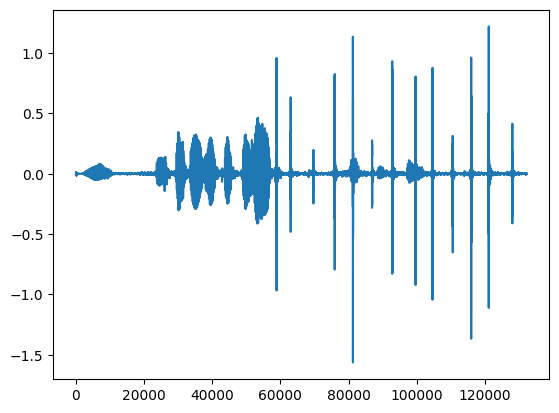

In [82]:
plt.plot(audio)

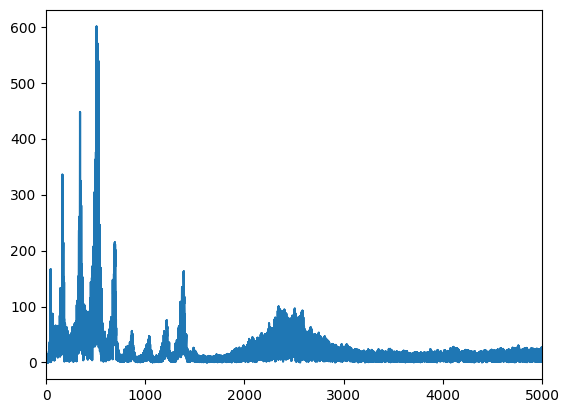

In [83]:
plot_fft(audio, 44100, 5000)

In [68]:
# Ok mais qu'est ce qu'on peut faire avec ca? 

In [84]:
audio.shape

(132300,)

In [85]:
audio

array([-1.5198377e-12,  4.8602217e-08,  2.9062164e-06, ...,
        8.1329723e-04,  5.9349905e-04,  1.1235213e-04], dtype=float32)

In [86]:
#a = audio.T[0] for hard_drive samples
a = audio #For microphone generated samples

In [87]:
# 30 biggest values?
ind = np.argpartition(a, -30)[-30:]
ind

array([ 75931,  99643, 121133,  58887, 104616,  81291,  99651,  99650,
       104634, 121138,  92822,  58896,  75945, 104617, 115981,  81269,
        99675,  75932,  58897,  81280,  92803,  92821,  58877,  81287,
       121139,  58878, 104633,  81288, 115985,  81270])

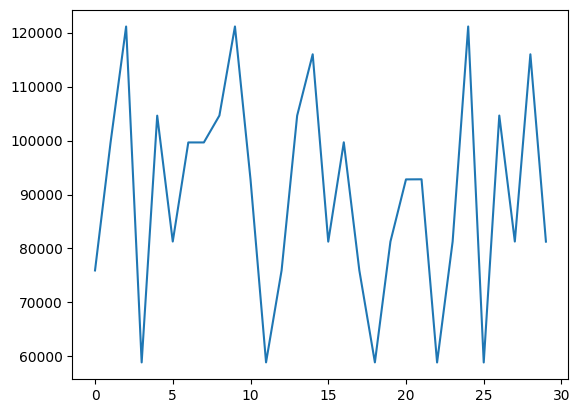

In [88]:
plt.plot(range(0,30),ind)